In [207]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


## Index
* [Fillna in Age attribute](#fillna_age)
* [Transform Sex into numeric type](#transform_sex)
* [Encode Embarked attribute](#encode_embark)
* [Remove useless features](#remove_useless)
* [Save CSV file](#save_csv)

In [208]:
titanic = pd.read_csv("train.csv")
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id="fillna_age"></a>
### Fillna in Age attribute
notice that in "Age" column, there are only 714 items, fewer than other attributes (which is 891). it indicates that there are a lot missing values in "Age"

In [209]:
print "there are %d NaN in Age attribute"%(np.count_nonzero( np.isnan(titanic.Age) ))

there are 177 NaN in Age attribute


In [210]:
print "mean of Age is: %3.2f"%(titanic.Age.mean())
print "median of Age is: %3.2f"%(titanic.Age.median())

mean of Age is: 29.70
median of Age is: 28.00


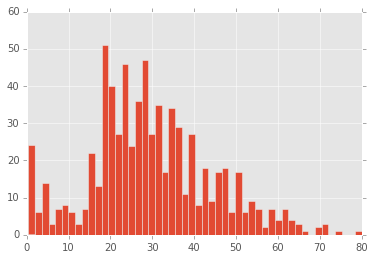

In [211]:
titanic.Age.hist(bins=50)

In [212]:
# decide to use median to fill the missing values
titanic.Age = titanic.Age.fillna(titanic.Age.median())
titanic.Age.describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

<a id="transform_sex"></a>
### Transform Sex attributes to numeric type

In [213]:
sexgrps = titanic.Sex.groupby(titanic.Sex).size()
sexgrps / (sexgrps.sum())

Sex
female    0.352413
male      0.647587
dtype: float64

In [214]:
titanic["IsMale"] = (titanic.Sex == "male").astype(int)
titanic.IsMale.mean()

0.6475869809203143

<a id="encode_embark"></a>
### Encode the Embarked attribute

In [215]:
titanic.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [216]:
nancount =np.count_nonzero(  pd.isnull(  titanic.Embarked ) )
print "there are %d missing values in Embarked attribute"%(nancount)

there are 2 missing values in Embarked attribute


In [217]:
embark_counts = titanic.Embarked.groupby(titanic.Embarked).size()
embark_counts

Embarked
C    168
Q     77
S    644
dtype: int64

In [218]:
print "maximum embark position is '%s' with count=%d"%(embark_counts.argmax(),embark_counts.max())

maximum embark position is 'S' with count=644


In [219]:
titanic.Embarked = titanic.Embarked.fillna(embark_counts.argmax())
titanic.Embarked.groupby(titanic.Embarked).size()

Embarked
C    168
Q     77
S    646
dtype: int64

In [220]:
def encode_category(category_values,nameprefix):
    unique_values = np.unique(category_values)
    
    datas = []
    names = []
    for onevalue in unique_values:
        datas.append( (category_values == onevalue).astype(int) )
        names.append(nameprefix+onevalue)
        
    return pd.concat(datas,axis=1,keys=names)

embarks = encode_category(titanic.Embarked,"Embark")
embarks.sum()

EmbarkC    168
EmbarkQ     77
EmbarkS    646
dtype: int64

In [221]:
# concatenate the Embarks DataFrame back to the original feature DataFrame
titanic = pd.concat([ titanic,embarks],axis=1)
titanic.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked',
       u'IsMale', u'EmbarkC', u'EmbarkQ', u'EmbarkS'],
      dtype='object')

<a id="remove_useless"></a>
### Remove useless features

In [222]:
nancount = np.count_nonzero( pd.isnull(  titanic.Cabin ) )
print "Cabin attribute has %d NaN, which is %3.2f%%"%(nancount,nancount*100.0/titanic.shape[0])

Cabin attribute has 687 NaN, which is 77.10%


In [223]:
del titanic["Cabin"]# there are more than 50% missing values in Cabin attribute, so delete that column
del titanic["PassengerId"]# useless for classification
del titanic["Ticket"]# cannot understand this feature, think it is useless
titanic.columns

Index([u'Survived', u'Pclass', u'Name', u'Sex', u'Age', u'SibSp', u'Parch',
       u'Fare', u'Embarked', u'IsMale', u'EmbarkC', u'EmbarkQ', u'EmbarkS'],
      dtype='object')

<a id="save_csv"></a>
### Save into CSV file

In [224]:
titanic.to_csv("train_processed.csv")